# Anomaly Detection: Continuous Probabilistic Methods

In [171]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [172]:
# Create function to get lower and upper bounds based on interquartile range

def get_lower_and_upper_bounds(col, k=1.5):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_fence, upper_fence = \
    (q1 - (k*iqr)), (q3 + (k*iqr))
    return lower_fence, upper_fence

In [173]:
# Acquire data
url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'

df = pd.read_csv(url)

In [174]:
# Convert the 'Date' column to a datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

In [175]:
df['month'] = df.index.month_name()

Spread of Information for Temperature


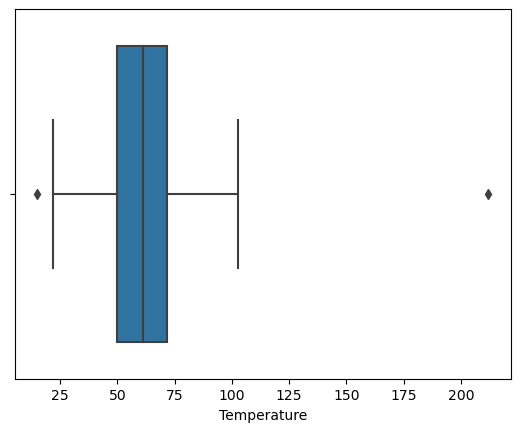

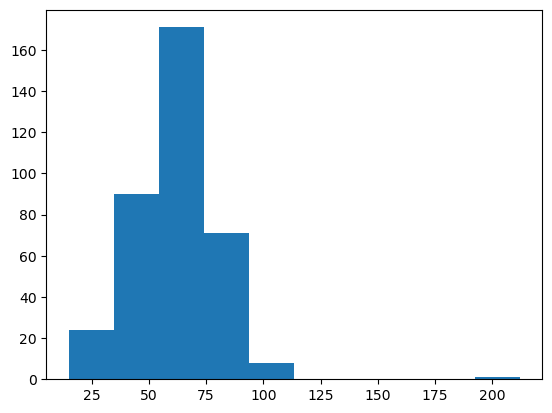

Spread of Information for Rainfall


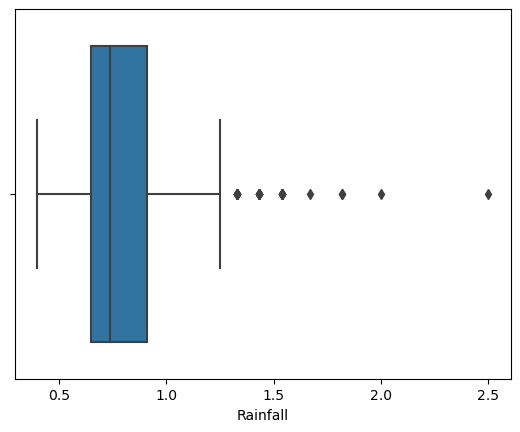

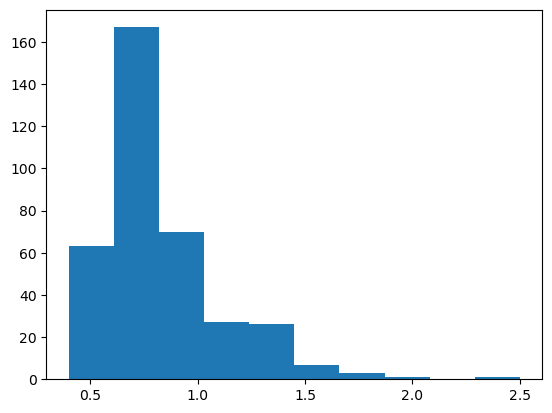

Spread of Information for Flyers


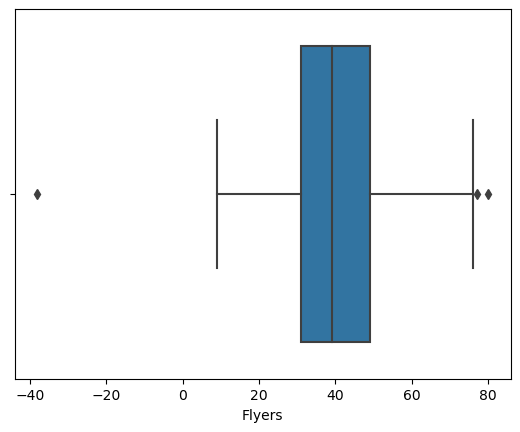

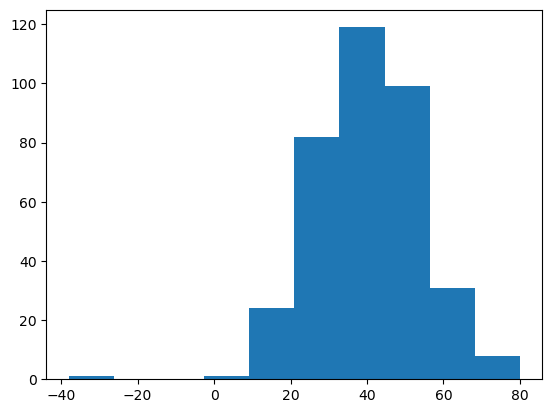

Spread of Information for Price


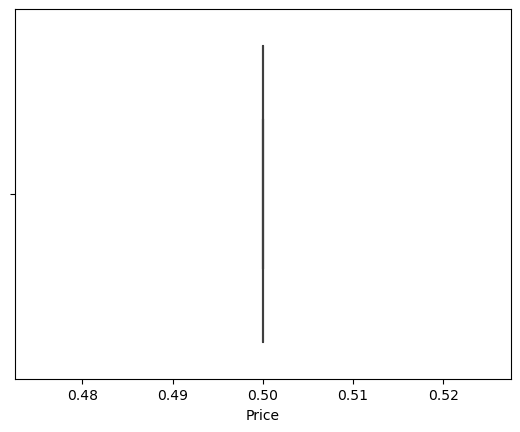

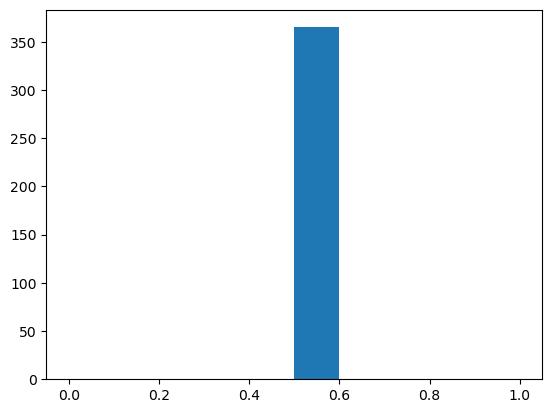

Spread of Information for Sales


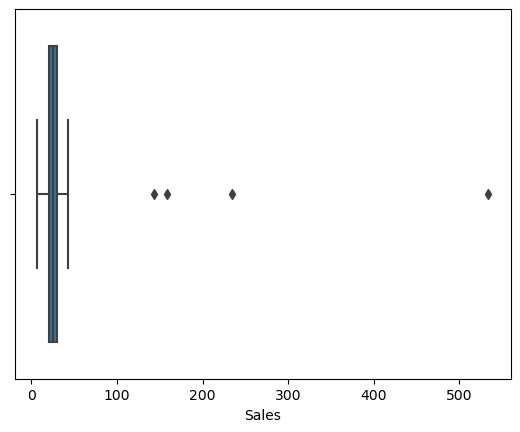

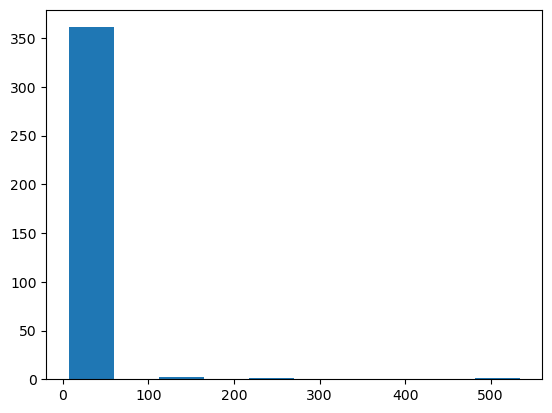

In [183]:
# hists and boxplots:
for col in df.drop(columns=['month','Day']).columns:
    print(f'Spread of Information for {col}')
    sns.boxplot(data=df, x=col)
    plt.show()
    plt.hist(df[col])
    plt.show()
    print('=================')

Spread of Information for Temperature


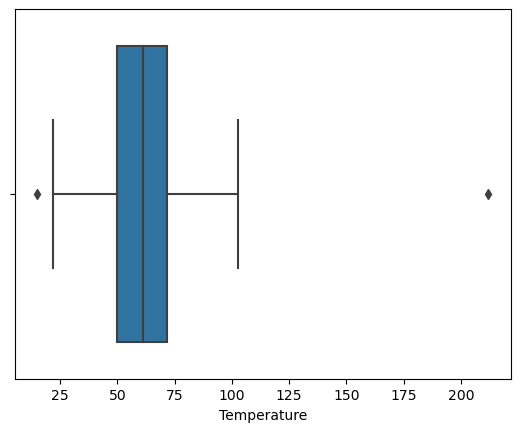

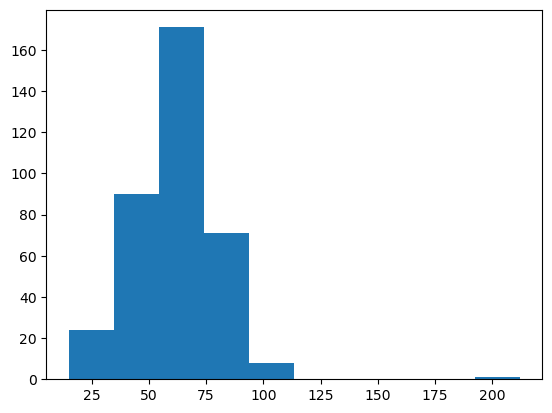

Spread of Information for Rainfall


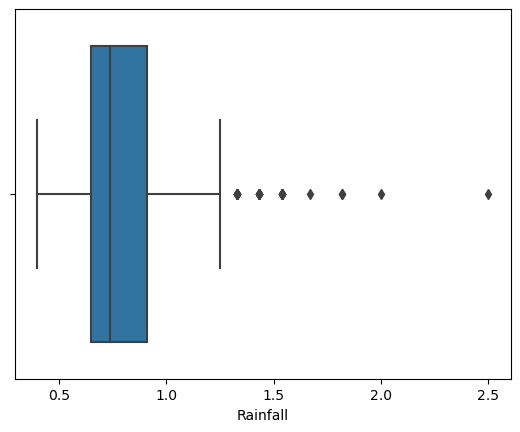

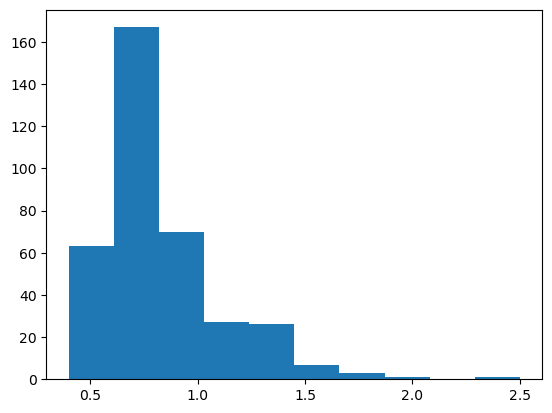

Spread of Information for Flyers


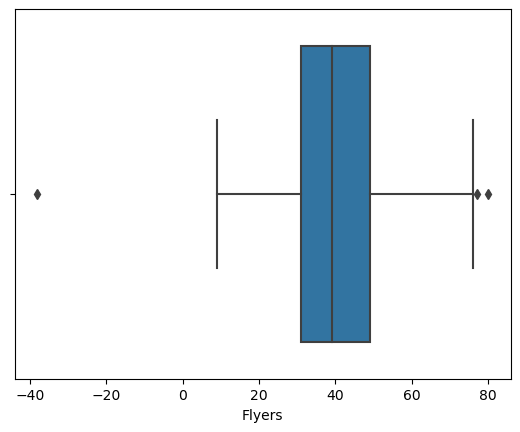

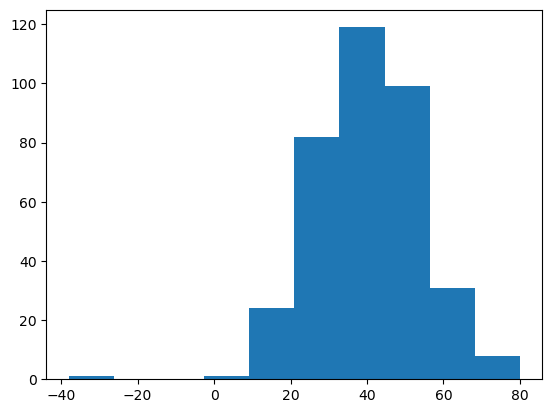

Spread of Information for Price


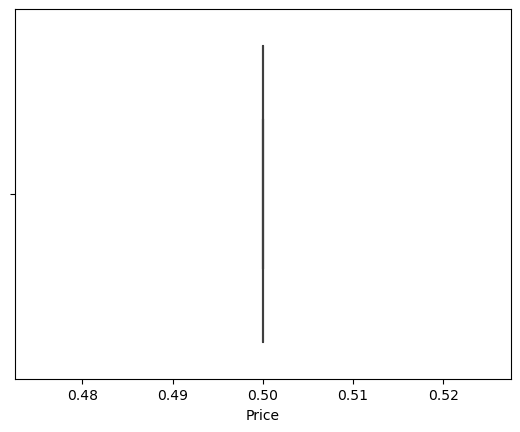

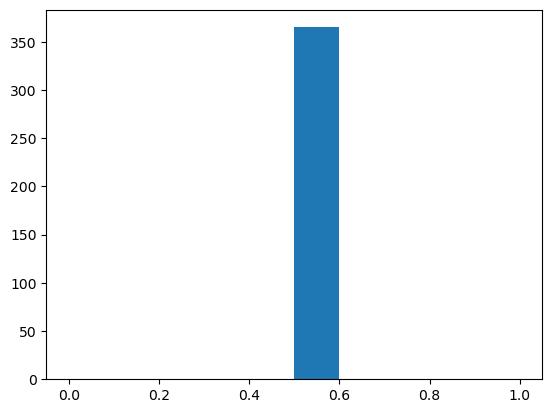

Spread of Information for Sales


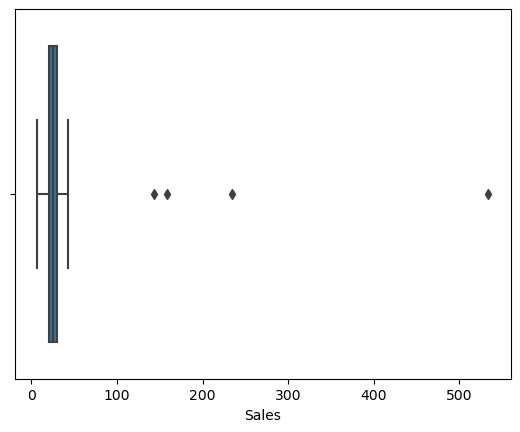

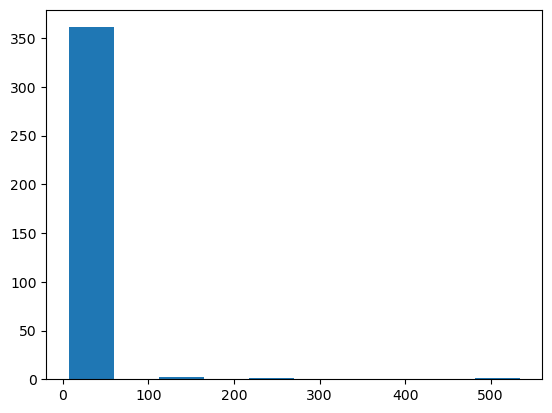

In [176]:
# hists and boxplots:
for col in df.columns:
    if col not in df[['month','Day']]:
        print(f'Spread of Information for {col}')
        sns.boxplot(data=df, x=col)
        plt.show()
        plt.hist(df[col])
        plt.show()
        print('=================')

## 1. Using lemonade.csv dataset and focusing on continuous variables:

* Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

**ANSWER:** 
* Temperature: Just a very cold day in Winter. Not much farther than 1.5 IQR. On December 31st, looks to be a valid measurement given the context.

* Flyers: Definitely an outlier that needs to be removed. A negative value for flyers doesn't make sense in this context.


In [177]:
for col in df.columns:
    if col not in df[['month', 'Day']]:
        lower_fence, upper_fence = get_lower_and_upper_bounds(col, k=1.5)
        print(f'Outliers on {col}')
        print(f'Lower Bound for {col}: {lower_fence}')
        print(
            df[
                (df[col]< lower_fence)
            ].to_markdown())
        print('====' * 20)

Outliers on Temperature
Lower Bound for Temperature: 16.700000000000003
| Date                | Day    |   Temperature |   Rainfall |   Flyers |   Price |   Sales | month    |
|:--------------------|:-------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-12-31 00:00:00 | Sunday |          15.1 |        2.5 |        9 |     0.5 |       7 | December |
Outliers on Rainfall
Lower Bound for Rainfall: 0.26
| Date   | Day   | Temperature   | Rainfall   | Flyers   | Price   | Sales   | month   |
|--------|-------|---------------|------------|----------|---------|---------|---------|
Outliers on Flyers
Lower Bound for Flyers: 4.0
| Date                | Day     |   Temperature |   Rainfall |   Flyers |   Price |   Sales | month    |
|:--------------------|:--------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-11-21 00:00:00 | Tuesday |            47 |       0.95 |      -38 |     0.5 |      20 | November |
Outliers on Price
Lower 

* Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

**ANSWER:**
* Temperature: This observation should be removed. A temp of 212 doesn't make sense and would end all life on earth.
* Rainfall: Most of the observations make sense. Possibly the 12/31 observation should be removed as it should be a snow instead of rain and this date was outside the lower_bound for temp as well.
* Flyers: These make sense and should be kept. There is also a high value of sales for this day which would make sense.
* Sales: Potential black swan event. These dates are the week of July 4, have higher temps, and high Flyer values. The day of july 4 is especially high and while likely a valid data point, is definitely a black swan event.

In [178]:
for col in df.columns:
    if col not in df[['month','Day']]:
        lower_fence, upper_fence = get_lower_and_upper_bounds(col, k=1.5)
        print(f'Outliers on {col}')
        print(f'Upper Bound for {col}: {upper_fence}')
        print(
            df[
                (df[col]> upper_fence)
            ].to_markdown())
        print('====' * 20)

Outliers on Temperature
Upper Bound for Temperature: 104.7
| Date                | Day      |   Temperature |   Rainfall |   Flyers |   Price |   Sales | month    |
|:--------------------|:---------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-02-11 00:00:00 | Saturday |           212 |       0.91 |       35 |     0.5 |      21 | February |
Outliers on Rainfall
Upper Bound for Rainfall: 1.3
| Date                | Day       |   Temperature |   Rainfall |   Flyers |   Price |   Sales | month    |
|:--------------------|:----------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-01-01 00:00:00 | Sunday    |          27   |       2    |       15 |     0.5 |      10 | January  |
| 2017-01-02 00:00:00 | Monday    |          28.9 |       1.33 |       15 |     0.5 |      13 | January  |
| 2017-01-03 00:00:00 | Tuesday   |          34.5 |       1.33 |       27 |     0.5 |      15 | January  |
| 2017-01-06 00:00:00 | Friday    |  

* Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

**ANSWER:**
* Flyers: This observation is negative and should be removed.

In [179]:
for col in df.columns:
    if col not in df[['month','Day']]:
        lower_fence, upper_fence = get_lower_and_upper_bounds(col, k=3)
        print(f'Outliers on {col}')
        print(f'Lower Bound for {col}: {lower_fence}')
        print(
            df[
                (df[col]< lower_fence)
            ].to_markdown())
        print('====' * 20)

Outliers on Temperature
Lower Bound for Temperature: -16.299999999999997
| Date   | Day   | Temperature   | Rainfall   | Flyers   | Price   | Sales   | month   |
|--------|-------|---------------|------------|----------|---------|---------|---------|
Outliers on Rainfall
Lower Bound for Rainfall: -0.13
| Date   | Day   | Temperature   | Rainfall   | Flyers   | Price   | Sales   | month   |
|--------|-------|---------------|------------|----------|---------|---------|---------|
Outliers on Flyers
Lower Bound for Flyers: -23.0
| Date                | Day     |   Temperature |   Rainfall |   Flyers |   Price |   Sales | month    |
|:--------------------|:--------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-11-21 00:00:00 | Tuesday |            47 |       0.95 |      -38 |     0.5 |      20 | November |
Outliers on Price
Lower Bound for Price: 0.5
| Date   | Day   | Temperature   | Rainfall   | Flyers   | Price   | Sales   | month   |
|--------|-------|--

* Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

**ANSWER:**
* Temperature: Definitely remove this observation. Too hot to be valid.
* Rainfall: These are likely snowfall instead of rain because the temp is so low on these days. Depending on the goal of my analysis I would likely remove them as they may add noise.
* Sales: Week of July 4th. While likely valid data. Would probably remove as there is a definite black swan event.

In [180]:
for col in df.columns:
    if col not in df[['month','Day']]:
        lower_fence, upper_fence = get_lower_and_upper_bounds(col, k=3)
        print(f'Outliers on {col}')
        print(f'Upper Bound for {col}: {upper_fence}')
        print(
            df[
                (df[col]> upper_fence)
            ].to_markdown())
        print('====' * 20)

Outliers on Temperature
Upper Bound for Temperature: 137.7
| Date                | Day      |   Temperature |   Rainfall |   Flyers |   Price |   Sales | month    |
|:--------------------|:---------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-02-11 00:00:00 | Saturday |           212 |       0.91 |       35 |     0.5 |      21 | February |
Outliers on Rainfall
Upper Bound for Rainfall: 1.69
| Date                | Day     |   Temperature |   Rainfall |   Flyers |   Price |   Sales | month    |
|:--------------------|:--------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-01-01 00:00:00 | Sunday  |          27   |       2    |       15 |     0.5 |      10 | January  |
| 2017-12-05 00:00:00 | Tuesday |          22   |       1.82 |       11 |     0.5 |      10 | December |
| 2017-12-10 00:00:00 | Sunday  |          31.3 |       1.82 |       15 |     0.5 |      11 | December |
| 2017-12-31 00:00:00 | Sunday  |          15.

## 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

> Normally Distributed:
> * Temperature
> * Rainfall (Right tail, but fairly normal distribution)
> * Flyers
> * Sales

Use a 2 sigma decision rule to isolate the outliers.

- Do these make sense?
- Should certain outliers be kept or removed?

**ANSWER:**
* Temperature: Not all of them make sense. The high of 212 should definitely be removed. The two low outliers should potentially be removed.
* Rainfall: They do seem to be valid except maybe for 12/31. I would likely keep all but the 12/31 observation.
* Flyers: Black Swans. Remove them.

In [181]:
for column_name in ['Temperature', 'Rainfall', 'Flyers', 'Sales']:
    x = df[column_name]
    zscores = pd.Series((x - x.mean()) / x.std())

    # Finds all of the observations two standard deviations or more.
    print(f'2 sigma outliers for {column_name}')
    print(x[zscores.abs() >= 2])


2 sigma outliers for Temperature
Date
2017-02-11    212.0
2017-06-16     99.3
2017-06-26    102.6
2017-07-01    102.9
2017-07-10     98.0
2017-07-18     99.3
2017-07-22     99.6
2017-07-27     97.9
2017-12-05     22.0
2017-12-31     15.1
Name: Temperature, dtype: float64
2 sigma outliers for Rainfall
Date
2017-01-01    2.00
2017-01-06    1.54
2017-01-07    1.54
2017-01-11    1.54
2017-01-16    1.67
2017-01-17    1.43
2017-01-20    1.43
2017-01-24    1.54
2017-12-04    1.54
2017-12-05    1.82
2017-12-09    1.43
2017-12-10    1.82
2017-12-13    1.43
2017-12-14    1.54
2017-12-18    1.43
2017-12-22    1.54
2017-12-26    1.43
2017-12-30    1.43
2017-12-31    2.50
Name: Rainfall, dtype: float64
2 sigma outliers for Flyers
Date
2017-06-16    77
2017-06-20    70
2017-06-21    76
2017-07-02    68
2017-07-03    68
2017-07-14    80
2017-07-18    76
2017-07-23    72
2017-07-24    69
2017-07-27    74
2017-11-21   -38
2017-12-05    11
2017-12-31     9
Name: Flyers, dtype: int64
2 sigma outliers for

## 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

**ANSWER:** 3 Sigma seems to be more appropriate than 2 in this case. I would remove all of the 3 sigma outliers.

In [185]:
for column_name in ['Temperature', 'Rainfall', 'Flyers', 'Sales']:
    x = df[column_name]
    zscores = pd.Series((x - x.mean()) / x.std())

    # Finds all of the observations two standard deviations or more.
    print(f'3 sigma outliers for {column_name}')
    print(x[zscores.abs() >= 3])

3 sigma outliers for Temperature
Date
2017-02-11    212.0
Name: Temperature, dtype: float64
3 sigma outliers for Rainfall
Date
2017-01-01    2.00
2017-01-16    1.67
2017-12-05    1.82
2017-12-10    1.82
2017-12-31    2.50
Name: Rainfall, dtype: float64
3 sigma outliers for Flyers
Date
2017-11-21   -38
Name: Flyers, dtype: int64
3 sigma outliers for Sales
Date
2017-07-01    143
2017-07-02    158
2017-07-03    235
2017-07-04    534
Name: Sales, dtype: int64
